C:\Users\LeRenard\anaconda3\envs\learning_3.7\lib\site-packages\ipykernel_launcher.py:66: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


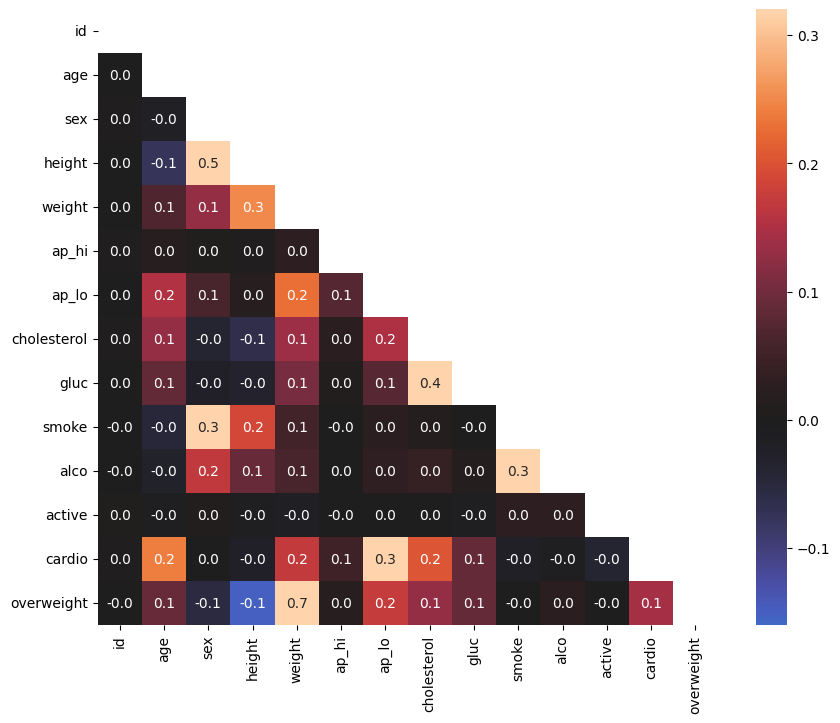

<Figure size 500x500 with 0 Axes>

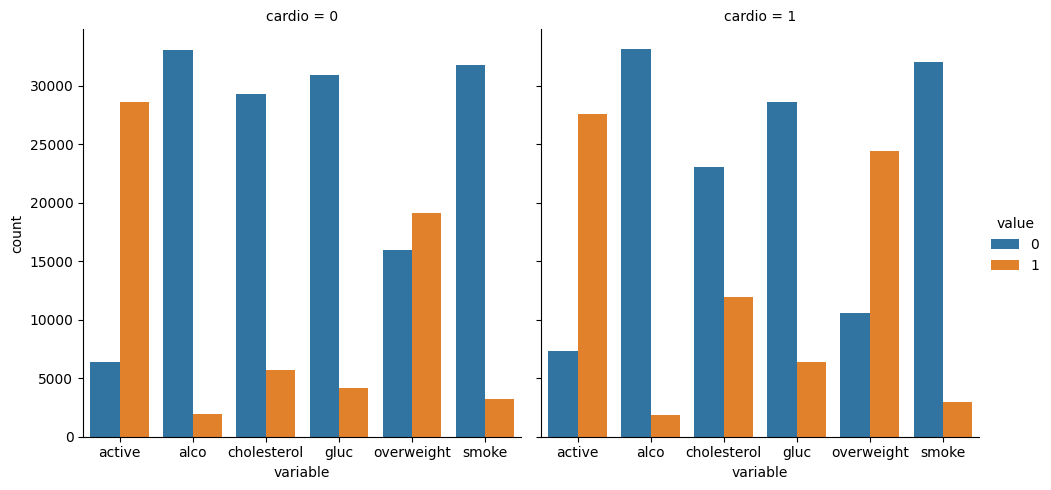

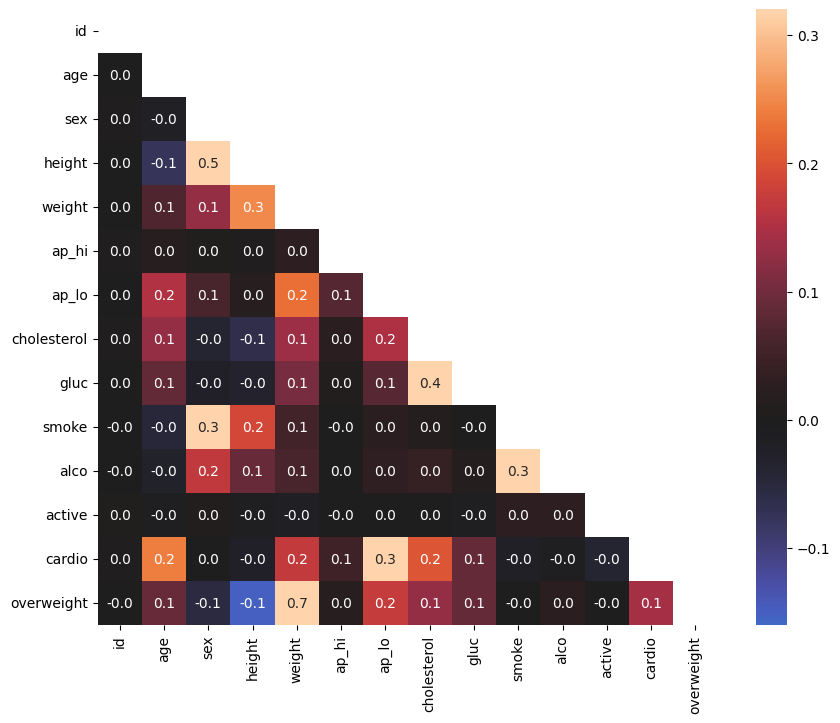

In [173]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import data
df = pd.read_csv("medical_examination.csv")

# Add 'overweight' column
df['overweight'] = df["weight"]/((df['height']/100)**2)
df["overweight"] = np.where(df["overweight"] >25, 1, 0)
# Normalize data by making 0 always good and 1 always bad. 
#If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)

# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
    df_cat = df.melt(value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])


    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
    df_cat = df.melt(id_vars="cardio",value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
    

    # Draw the catplot with 'sns.catplot()'



    # Get the figure for the output
    arr = ['active','alco','cholesterol','gluc','overweight','smoke']

    plt.figure(figsize=(5,5))
    fig = sns.catplot(x='variable', hue='value',
            kind='count', data=df_cat, order=arr, col="cardio")
    plt.xlabel("variable")
    plt.ylabel("Total")


    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig


# Draw Heat Map
def draw_heat_map():
    df_heat = df
    #df['ap_lo'] <= df['ap_hi']) is the correct, therefore the opposite would be > alone
    #(df['height'] >= df['height'].quantile(0.025)) is correct data, therefore remove with using the opposite of the inequality <
    wrong_press_list = df[(df['ap_lo'] > df['ap_hi'])].index.tolist()
    lower_25 = df[(df['height'] < df['height'].quantile(0.025))].index.tolist()
    higher_975 = df[(df['height'] > df['height'].quantile(0.975))].index.tolist()
    lighter_25 = df[(df['weight'] < df['weight'].quantile(0.025))].index.tolist()
    heavier_25 = df[(df['weight'] > df['weight'].quantile(0.975))].index.tolist()
    #getting the list of indexes which are approaching outliers
    all_list = wrong_press_list+lower_25+higher_975+lighter_25+heavier_25
    all_list = [*set(all_list)]
    df_heat = df_heat.drop(all_list)

    # Calculate the correlation matrix
    corr = df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(10,8))

    # Draw the heatmap with 'sns.heatmap()'
    ax = sns.heatmap(corr, mask=mask, center=0, annot=True,fmt='.1f',vmin=-0.16, vmax=0.32)


    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig

In [155]:
df = pd.read_csv("medical_examination.csv")
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [156]:
df['overweight'] = df["weight"]/((df['height']/100)**2)
df["overweight"] = np.where(df["overweight"] >25, 1, 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1


In [157]:
df["cholesterol"] = np.where(df["cholesterol"] == 1, 0, 1)
df["gluc"] = np.where(df["gluc"] == 1, 0, 1)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1


In [158]:
df_cat=df.melt(id_vars="cardio",value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
# Create DataFrame for cat plot using `pd.melt` using just the values from 
#'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight
df_cat

,cardio,variable,value
0,0,cholesterol,0
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
4,0,cholesterol,0
...,...,...,...
419995,0,overweight,1
419996,1,overweight,1
419997,1,overweight,1
419998,1,overweight,1


In [159]:
# Group and reformat the data to split it by 'cardio'. Show the counts 
#of each feature. You will have to rename one of the columns for the catplot to work correctly.
#ind_row = df.loc[df['native-country'] == "India", 'native-country']
c0_list = df_cat.loc[df_cat['cardio'] == 0, 'cardio']
df_cat_c0 = df_cat.iloc[df_cat.index.isin(c0_list.index)]
df_cat_c0

,cardio,variable,value
0,0,cholesterol,0
4,0,cholesterol,0
5,0,cholesterol,1
6,0,cholesterol,1
8,0,cholesterol,0
...,...,...,...
419987,0,overweight,0
419988,0,overweight,0
419991,0,overweight,1
419995,0,overweight,1


In [160]:
c1_list = df_cat.loc[df_cat['cardio'] == 1, 'cardio']
df_cat_c1 = df_cat.iloc[df_cat.index.isin(c1_list.index)]
df_cat_c1

,cardio,variable,value
1,1,cholesterol,1
2,1,cholesterol,1
3,1,cholesterol,0
7,1,cholesterol,1
15,1,cholesterol,0
...,...,...,...
419993,1,overweight,0
419994,1,overweight,1
419996,1,overweight,1
419997,1,overweight,1


<Figure size 500x500 with 0 Axes>

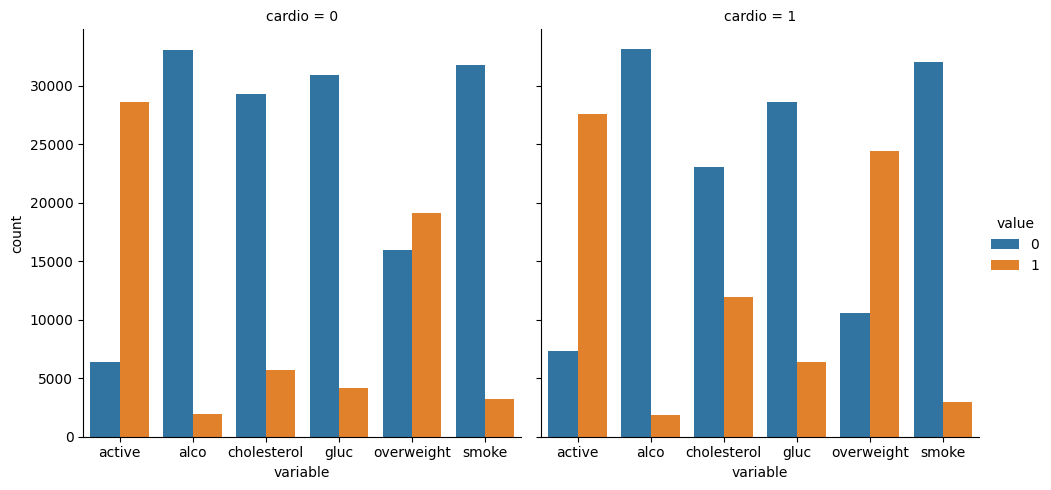

In [161]:
#plt.rcParams["figure.autolayout"] = True
#f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
arr = ['active','alco','cholesterol','gluc','overweight','smoke']

plt.figure(figsize=(5,5))
fig = sns.catplot(x='variable', hue='value',
            kind='count', data=df_cat, order=arr, col="cardio")
plt.xlabel("variable")
plt.ylabel("Total")


fig.savefig('catplot.png')

In [163]:
df_heat = df
#df['ap_lo'] <= df['ap_hi']) is the correct, therefore the opposite would be > alone
#(df['height'] >= df['height'].quantile(0.025)) is correct data, therefore remove with using the opposite of the inequality <
wrong_press_list = df[(df['ap_lo'] > df['ap_hi'])].index.tolist()
lower_25 = df[(df['height'] < df['height'].quantile(0.025))].index.tolist()
higher_975 = df[(df['height'] > df['height'].quantile(0.975))].index.tolist()
lighter_25 = df[(df['weight'] < df['weight'].quantile(0.025))].index.tolist()
heavier_25 = df[(df['weight'] > df['weight'].quantile(0.975))].index.tolist()
#getting the list of indexes which are approaching outliers
all_list = wrong_press_list+lower_25+higher_975+lighter_25+heavier_25
all_list = [*set(all_list)]
df_heat = df_heat.drop(all_list)

In [164]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [165]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

C:\Users\LeRenard\anaconda3\envs\learning_3.7\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

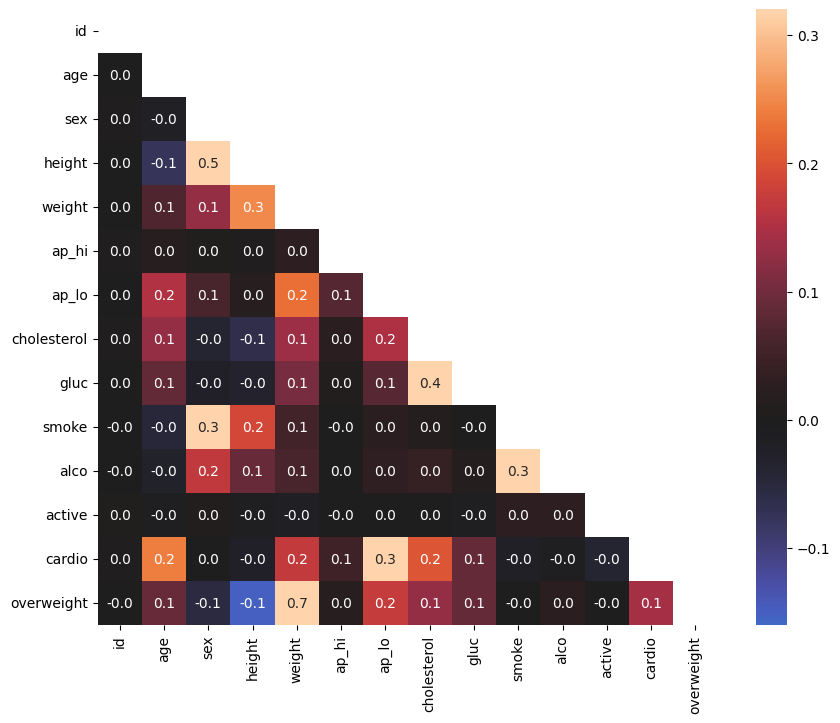

In [171]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, center=0, annot=True,
            fmt='.1f',vmin=-0.16, vmax=0.32)